# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We assume you are using TF 2.

## Loading the packages

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [2]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# ... import here the different keras libraries you need

# we do a shallow network, not a deep learning network
# 1 layer network for MNIST

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras import regularizers

from tensorflow.keras import utils



%matplotlib inline

## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

170500096/170498071 [==============================] - 20s 0us/step


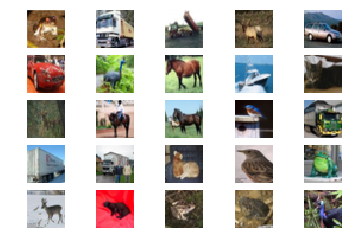

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    
    #prepare print of 25 images
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Cifar still holds 10 classes (from Dog to Aircraft)

show_imgs(X_train)     # get the 25 images (which were previously prepared) from Xtrain
print(X_train.shape)
print(X_test.shape)

In [4]:
# DO NOT DO FOR CIFAR   
# We need the picture to remain a picture (to be able to use filters!!)
#X_train =  X_train.reshape(50000,3072)# flatten input into vector:  change the shape towards (60000, 3072)
# 3072 = 32 * 32 * 3
# could be done by another layer (flatten) but we do it by hand
#X_test =   X_test.reshape(10000,3072)#flatte test                  idem (10000, 3072)


#THis still needs to be done
#Values need to be normalized in range 0 to 1 
X_train =  X_train.astype('float32')       # change the type towards float32  (from integer)
X_test =   X_test.astype('float32')        # same for test set
X_train = X_train / 255.0                   #normalize the range to be between 0.0 and 1.0 (255 = max value)
X_test =  X_test / 255.0                    # same for xtest
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [5]:
n_classes = 10
#use util function from keras
Y_train = utils.to_categorical(y_train, n_classes) # modify targets to 1-hot using utils.to_categorical()
Y_test = utils.to_categorical(y_test, n_classes)# ...                   idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [6]:
#Exercise 8.2  One Layer Network
E = 5                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Sequential type
model = Sequential()     #define sequential model

#add Flatten Layer to go from 32x32x3 to (1,3072). 
model.add(Flatten(input_shape=(32,32,3)))
#Add a last dense layers for the 10 classes, careful input is from MaxPolling -->(16,16,32)
#model.add(Dense(n_classes, input_shape=(1,3072), activation = 'softmax',kernel_regularizer=regularizers.l2(0.05)))

#Add a last dense layers for the 10 classes, careful input is from MaxPolling -->(16,16,32)
model.add(Dense(n_classes, activation = 'softmax',kernel_regularizer=regularizers.l2(0.05)))
    

# ... print model infomration with summary() method 
model.summary()

# Conclusion 
# Accuracy reached 36% on epoch 4

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


# Two-layers network and weight visualisation
###  Start with the following configuration : 128 neurons on the hidden layer, 30 training epochs, a batch size of 128 images, a eelu relu activation on the hidden layer, a softmax activation at the output layer, categorical-crossentropy loss and adam optimizer. You don’t need to use a L2 regularizer in this model. This configuration should give you an accuracy around 45% onthe test set.

In [7]:
#Exercise 8.2  Two Layer Network
E = 5                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Sequential type
model = Sequential()     #define sequential model

#add Flatten Layer to go from 32x32x3 to (1,3072). 
model.add(Flatten(input_shape=(32,32,3)))

#Add a hidden Layer with 128 neurons
model.add(Dense(128, activation = 'relu'))
#Add a last dense layers for the 10 classes, careful input is from MaxPolling -->(16,16,32)
model.add(Dense(n_classes, activation = 'softmax'))
    

# ... print model infomration with summary() method 
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


# Exercise 3 CNN with Keras on CIFAR10
###  Modify your MLP version from the previous exercise towards Convolutional Neural Networks

In [8]:
#Exercise 8.3


E = 5                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Sequential type
model = Sequential()     #define sequential model

# this applies 32 convolution filters of size 1x1 each. 
# Stride is set to (1,1) 
model.add(Conv2D(32, (3, 3),strides=(1, 1), padding = "same", input_shape=(32, 32, 3) ))

#add Actication Function Relu with alpha=0.0  (wert für x < 0) max_value = 0
model.add(Activation('relu'))


#add MaxPolling layer for downsampling
# Size = 2
# Resulting Resolution 16 x 16 x 32
model.add(MaxPooling2D(pool_size=(2, 2)))

#add Flatten Layer to go from 16x16x32 to (1,8192). 
model.add(Flatten())
#Add a last dense layers for the 10 classes, careful input is from MaxPolling -->(16,16,32)
model.add(Dense(n_classes, input_shape=(1,8192), activation = 'softmax'))
    

# ... print model infomration with summary() method 
model.summary()

# Conclusion
# val_accuracy: 0.6083

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [9]:
# ... compile the model with a crossentropy loss, rmsprop optimizer 
#      and defining metrics to be stored as history of the training
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])    #compile defined model (with loss function, optimizer and metrics )
# optimizer defines how the learning rate and so on are updated / changed for better performance
# metrics saves the computed vales for later prints and inspections  (we look for accuracy)

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
print(X_train.shape)
print(Y_train.shape)
log = model.fit(X_train,Y_train, batch_size = B,epochs = E, verbose = 1, validation_data = (X_test,Y_test))
#validation is the test with test data
# log = logged data from metrics (accuracy)


(50000, 32, 32, 3)
(50000, 10)
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 15s 307us/sample - loss: 1.5730 - accuracy: 0.4503 - val_loss: 1.3506 - val_accuracy: 0.5308
Epoch 2/5
50000/50000 [==============================] - 14s 270us/sample - loss: 1.2730 - accuracy: 0.5587 - val_loss: 1.2490 - val_accuracy: 0.5595
Epoch 3/5
50000/50000 [==============================] - 13s 270us/sample - loss: 1.1829 - accuracy: 0.5918 - val_loss: 1.2023 - val_accuracy: 0.5792
Epoch 4/5
50000/50000 [==============================] - 14s 271us/sample - loss: 1.1181 - accuracy: 0.6156 - val_loss: 1.1588 - val_accuracy: 0.5984
Epoch 5/5
50000/50000 [==============================] - 14s 272us/sample - loss: 1.0711 - accuracy: 0.6317 - val_loss: 1.1242 - val_accuracy: 0.6131


## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

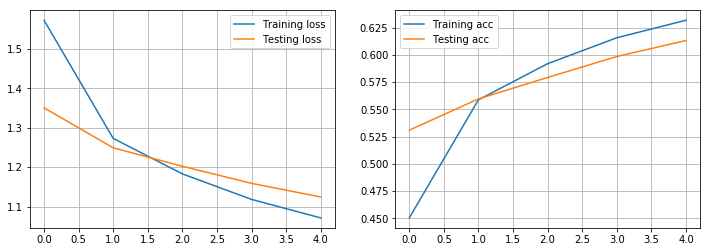

In [10]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [11]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose = 0)# evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.1242336261749268
Test accuracy: 0.6131


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [12]:
pred = model.predict_classes(X_test, verbose=0)
#plot confusion matrix --> how is performance of network
confusion_matrix(y_test, pred)

array([[748,  12,  40,  18,  16,   8,  19,   8,  59,  72],
       [ 44, 637,  13,  17,   5,   4,  11,   6,  37, 226],
       [115,   6, 389,  79, 136,  77, 107,  44,  16,  31],
       [ 26,  10,  68, 462, 102, 124, 109,  38,  13,  48],
       [ 50,   1,  82,  73, 565,  31, 112,  60,  13,  13],
       [ 19,   4,  60, 212,  88, 462,  49,  73,  14,  19],
       [  9,   5,  38,  57,  47,  11, 807,   7,   3,  16],
       [ 34,   2,  30,  69,  85,  73,  31, 626,   4,  46],
       [175,  47,   8,  21,   6,   8,  13,   8, 650,  64],
       [ 60,  54,  10,  21,  10,  10,  14,  16,  20, 785]], dtype=int64)

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(3, 3, 3, 32)
(32,)
(8192, 10)
(10,)


ValueError: cannot reshape array of size 8192 into shape (32,32,3)

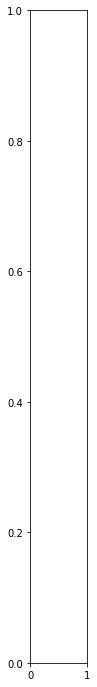

In [13]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
    
#for exercise 8.1
# there are 2 sets of weights alltough there is only 1 layer
# (784,10) (weights of layer 1)
# (10,)  (bias)
    
    
w1 = weights[2]
f = plt.figure(figsize=(12,12))
for i in range(10):                       # for all weight groups (to all 10 neurons)   plot those weights
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                          #get the weights landing to neuron i
    im = im.reshape(32,32,3)                #reshape the vector of weights into 28x28 image (from 784)
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)                      # get the min of im
    max = np.max(im)                      # get the max of im
    im = (im - min)/(max - min)           # perform a min-max norm  (so values are normed between  0 and 1)
    im = im * 255                         # multiply by 255  convert to 8 bits pixel values 
    im = np.round(im).astype(int)         # round and convert to int                    
    ax.axis('off')
    ax.imshow(im)

## Deeper CNN
**8.3 Simple CNN**: Test loss: 1.1242336261749268, Test accuracy: 0.6131

In [14]:
#Exercise 8.3 b) model 2

E = 5                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Sequential type
model1 = Sequential()     #define sequential model
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(n_classes, input_shape=(1,8192), activation = 'softmax'))

# ... print model infomration with summary() method 
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])    #compile defined model (with loss function, optimizer and metrics )
history1 = model1.fit(X_train,Y_train, batch_size = B,epochs = E, verbose = 1, validation_data = (X_test,Y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
____________________________________________

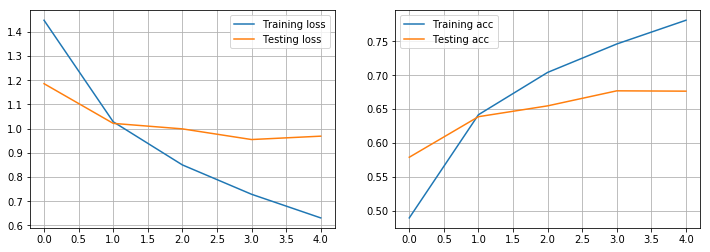

In [15]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(history1.history['loss'], label='Training loss')
ax1.plot(history1.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(history1.history['accuracy'], label='Training acc')
ax2.plot(history1.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [16]:
loss_test, metric_test = model1.evaluate(X_test, Y_test, verbose = 0)# evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.9686453534126281
Test accuracy: 0.6765


In [18]:
#Exercise 8.3 b) model 3

E = 5                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Sequential type
model2 = Sequential()     #define sequential model
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(n_classes, input_shape=(1,8192), activation = 'softmax'))

# ... print model infomration with summary() method 
model2.summary()
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])    #compile defined model (with loss function, optimizer and metrics )
history2 = model2.fit(X_train,Y_train, batch_size = B,epochs = E, verbose = 1, validation_data = (X_test,Y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

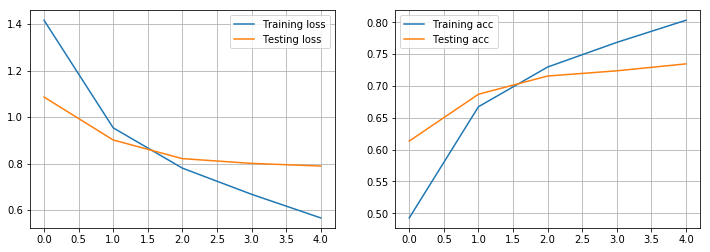

In [19]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(history2.history['loss'], label='Training loss')
ax1.plot(history2.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(history2.history['accuracy'], label='Training acc')
ax2.plot(history2.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [20]:
loss_test, metric_test = model2.evaluate(X_test, Y_test, verbose = 0)# evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.7894786290168763
Test accuracy: 0.7347


In [21]:
#Exercise 8.3 b) model 4

E = 5                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Sequential type
model3 = Sequential()     #define sequential model
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(n_classes, input_shape=(1,8192), activation = 'softmax'))

# ... print model infomration with summary() method 
model3.summary()
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])    #compile defined model (with loss function, optimizer and metrics )
history3 = model3.fit(X_train,Y_train, batch_size = B,epochs = E, verbose = 1, validation_data = (X_test,Y_test))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)        

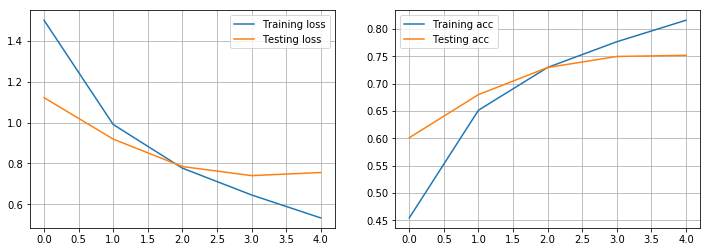

In [22]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(history3.history['loss'], label='Training loss')
ax1.plot(history3.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(history3.history['accuracy'], label='Training acc')
ax2.plot(history3.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [23]:
loss_test, metric_test = model3.evaluate(X_test, Y_test, verbose = 0)# evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.7555798162937164
Test accuracy: 0.7517


In [25]:
#Exercise 8.3 b) model 5
from tensorflow.keras.layers import Dropout

E = 50                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Sequential type
model4 = Sequential()     #define sequential model
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.2))
model4.add(Dense(n_classes, input_shape=(1,8192), activation = 'softmax'))

# ... print model infomration with summary() method 
model4.summary()
model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])    #compile defined model (with loss function, optimizer and metrics )
history4 = model4.fit(X_train,Y_train, batch_size = B,epochs = E, verbose = 1, validation_data = (X_test,Y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)         

50000/50000 [==============================] - 130s 3ms/sample - loss: 0.2331 - accuracy: 0.9171 - val_loss: 0.6607 - val_accuracy: 0.8224
Epoch 39/50
50000/50000 [==============================] - 135s 3ms/sample - loss: 0.2301 - accuracy: 0.9189 - val_loss: 0.6609 - val_accuracy: 0.8237
Epoch 40/50
50000/50000 [==============================] - 132s 3ms/sample - loss: 0.2249 - accuracy: 0.9214 - val_loss: 0.6435 - val_accuracy: 0.8265
Epoch 41/50
50000/50000 [==============================] - 132s 3ms/sample - loss: 0.2218 - accuracy: 0.9221 - val_loss: 0.6609 - val_accuracy: 0.8241
Epoch 42/50
50000/50000 [==============================] - 133s 3ms/sample - loss: 0.2214 - accuracy: 0.9214 - val_loss: 0.6820 - val_accuracy: 0.8247
Epoch 43/50
50000/50000 [==============================] - 130s 3ms/sample - loss: 0.2189 - accuracy: 0.9220 - val_loss: 0.6596 - val_accuracy: 0.8261
Epoch 44/50
50000/50000 [==============================] - 131s 3ms/sample - loss: 0.2228 - accuracy: 0.92

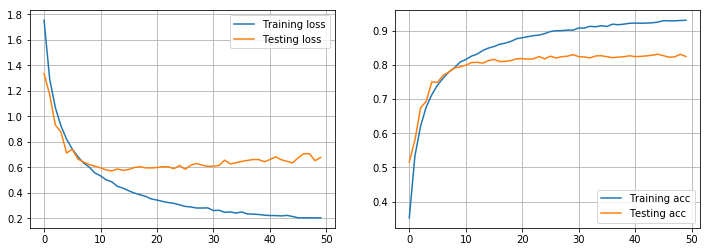

In [26]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(history4.history['loss'], label='Training loss')
ax1.plot(history4.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(history4.history['accuracy'], label='Training acc')
ax2.plot(history4.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [27]:
loss_test, metric_test = model4.evaluate(X_test, Y_test, verbose = 0)# evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.6775738129615784
Test accuracy: 0.8243


### Results

**1. Simple CNN**: Train accuracy: 0.6317, Test loss: 1.1242336261749268, Test accuracy: 0.6131

**2. Simple VGG architecture**: Train accuracy: 0.7812, Test loss: 0.9686453534126281, Test accuracy: 0.6765

**3. VGG architecture 1**: Train accuracy: 0.8032, Test loss: 0.7894786290168763, Test accuracy: 0.7347

**4. VGG architecture 2**: Train accuracy: 0.8158, Test loss: 0.7555798162937164, Test accuracy: 0.7517

**5. VGG architecture 2 & Dropout **: Train accuracy: 0.9303, Test loss: 0.6775738129615784, Test accuracy: 0.8243

Architectures 2,3,4,5 from [1],[2]

Notes:

- Architecture 5: Does not get much better after 24 Epochs!
- More Data?
- kernel_initializer: https://keras.io/initializers/#randomnormal
- Interesting links: 

[1] https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/ 

[2] https://paperswithcode.com/sota/image-classification-on-cifar-10